In [23]:
# Import Libraries 

import numpy as np 
from keras.models import Sequential
import tensorflow as tf
from keras.layers import LSTM, Input, Dropout, Dense, RepeatVector, TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
import random 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
import seaborn as sns 
import time
#import plotly.graph_objs as go
#from plotly.subplots import make_subplots

Number of rows where zero values were replaced: 594512
Remaining rows with zero values: 0
Start date is: 2024-11-29 20:40:32
End date is: 2024-12-06 20:40:32


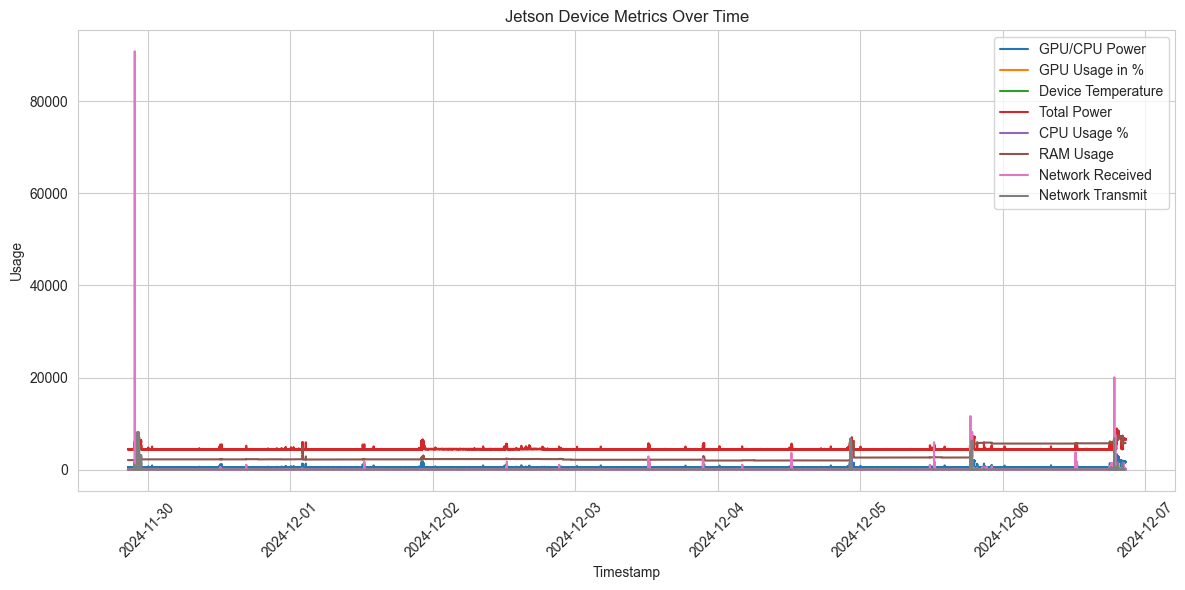

In [29]:
# Set random seed 
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Load the dataset
data1 = pd.read_csv('FL_client/src/Train_data/NANO07/Nano07.csv')
dataframe = data1

# Convert 'timestamp' column to datetime
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])

# Filter relevant columns
df = dataframe[['timestamp', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_gpu_usage_percent', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent',
                'jetson_ram_usage_mb', 'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']]
df.set_index('timestamp', inplace=True)
# Replace zero values with 0.01
df.replace(0, 0.01, inplace=True)

# Count the number of rows where zero values were replaced with 0.01
num_rows_with_zero_replaced = len(df[(df == 0.01).any(axis=1)])
print(f"Number of rows where zero values were replaced: {num_rows_with_zero_replaced}")

# check if there are any remaining zero values
remaining_zeros = df[(df == 0).any(axis=1)]
print(f"Remaining rows with zero values: {len(remaining_zeros)}")
# Print start and end date
print("Start date is:", df.index.min())
print("End date is:", df.index.max())

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='jetson_vdd_cpu_gpu_cv_mw', data=df, label='GPU/CPU Power')
sns.lineplot(x=df.index, y='jetson_gpu_usage_percent', data=df, label='GPU Usage in %')
sns.lineplot(x=df.index, y='jetson_board_temperature_celsius', data=df, label='Device Temperature')
sns.lineplot(x=df.index, y='jetson_vdd_in_mw', data=df, label='Total Power')
sns.lineplot(x=df.index, y='jetson_cpu_usage_percent', data=df, label='CPU Usage %')
sns.lineplot(x=df.index, y='jetson_ram_usage_mb', data=df, label='RAM Usage')
sns.lineplot(x=df.index, y='node_network_receive_bytes_total_KBps', data=df, label='Network Received')
sns.lineplot(x=df.index, y='node_network_transmit_bytes_total_KBps', data=df, label='Network Transmit')
plt.title('Jetson Device Metrics Over Time')
plt.ylabel('Usage')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.gcf().set_facecolor('white')
plt.legend()
plt.tight_layout()
plt.show()



In [30]:
# import pandas as pd
# import numpy as np
# import random
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Set random seed
# np.random.seed(42)
# random.seed(42)
# tf.random.set_seed(42)
# 
# # Load the dataset
# data1 = pd.read_csv('FL_client/src/Train_data/AGX04/AGX04.csv')
# dataframe = data1
# 
# # Convert 'timestamp' column to datetime
# dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])
# 
# # Filter relevant columns
# df = dataframe[['timestamp', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_gpu_usage_percent', 'jetson_board_temperature_celsius', 
#                 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent', 'jetson_ram_usage_mb', 
#                 'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']]
# df.set_index('timestamp', inplace=True)
# 
# # Replace zero values with 0.01
# df.replace(0, 0.01, inplace=True)
# 
# # Count the number of rows where zero values were replaced with 0.01
# num_rows_with_zero_replaced = len(df[(df == 0.01).any(axis=1)])
# print(f"Number of rows where zero values were replaced: {num_rows_with_zero_replaced}")
# 
# # Check if there are any remaining zero values
# remaining_zeros = df[(df == 0).any(axis=1)]
# print(f"Remaining rows with zero values: {len(remaining_zeros)}")
# 
# # Print start and end date of the full dataset
# print("Start date is:", df.index.min())
# print("End date is:", df.index.max())
# 
# # Filter the dataframe for the first 3 days
# start_date = df.index.min()
# end_date = start_date + pd.Timedelta(days=3)
# df = df[(df.index >= start_date) & (df.index < end_date)]
# 
# # Print the start and end date for the filtered data
# print("Start date for filtered data:", df.index.min())
# print("End date for filtered data:", df.index.max())
# 
# # Create the line plot for the first 3 days
# plt.figure(figsize=(12, 6))
# sns.lineplot(x=df.index, y='jetson_vdd_cpu_gpu_cv_mw', data=df, label='GPU/CPU Power')
# sns.lineplot(x=df.index, y='jetson_gpu_usage_percent', data=df, label='GPU Usage in %')
# sns.lineplot(x=df.index, y='jetson_board_temperature_celsius', data=df, label='Device Temperature')
# sns.lineplot(x=df.index, y='jetson_vdd_in_mw', data=df, label='Total Power')
# sns.lineplot(x=df.index, y='jetson_cpu_usage_percent', data=df, label='CPU Usage %')
# sns.lineplot(x=df.index, y='jetson_ram_usage_mb', data=df, label='RAM Usage')
# sns.lineplot(x=df.index, y='node_network_receive_bytes_total_KBps', data=df, label='Network Received')
# sns.lineplot(x=df.index, y='node_network_transmit_bytes_total_KBps', data=df, label='Network Transmit')
# plt.title('Jetson Device Metrics Over First 3 Days')
# plt.ylabel('Usage')
# plt.xlabel('Timestamp')
# plt.xticks(rotation=45)
# plt.gcf().set_facecolor('white')
# plt.legend()
# plt.tight_layout()
# plt.show()


Train start date: 2024-11-29 20:40:32
Train end date: 2024-12-05 11:04:31
Test start date: 2024-12-05 11:04:32
Test end date: 2024-12-06 20:40:32
Train set shape: (483840, 8)
Test set shape: (120961, 8)


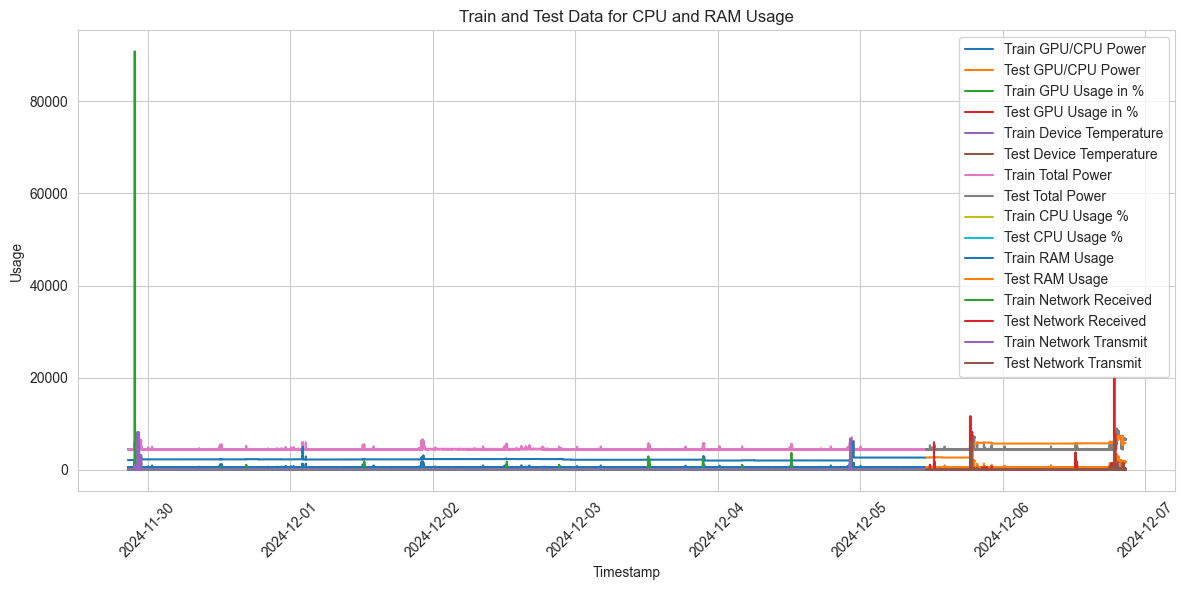

train data                      jetson_vdd_cpu_gpu_cv_mw  jetson_gpu_usage_percent  \
timestamp                                                                 
2024-11-29 20:40:32                       476                      0.01   
2024-11-29 20:40:33                       476                      0.01   
2024-11-29 20:40:34                       476                      0.01   
2024-11-29 20:40:35                       476                      0.01   
2024-11-29 20:40:36                       476                      0.01   

                     jetson_board_temperature_celsius  jetson_vdd_in_mw  \
timestamp                                                                 
2024-11-29 20:40:32                         39.062333              4411   
2024-11-29 20:40:33                         39.082833              4411   
2024-11-29 20:40:34                         38.973667              4411   
2024-11-29 20:40:35                         39.083333              4451   
2024-11-29 20

In [31]:
# Train and Test Split 
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Print the start and end dates for each split
print("Train start date:", train.index.min())
print("Train end date:", train.index.max())
print("Test start date:", test.index.min())
print("Test end date:", test.index.max())
print("Train set shape:", train.shape)
print("Test set shape:", test.shape)

# Create a line plot for both train and test data
plt.figure(figsize=(12, 6))

# Plot the split
sns.lineplot(x=train.index, y=train['jetson_vdd_cpu_gpu_cv_mw'], label='Train GPU/CPU Power')
sns.lineplot(x=test.index, y=test['jetson_vdd_cpu_gpu_cv_mw'], label='Test GPU/CPU Power')

sns.lineplot(x=train.index, y=train['jetson_gpu_usage_percent'], label='Train GPU Usage in %')
sns.lineplot(x=test.index, y=test['jetson_gpu_usage_percent'], label='Test GPU Usage in %')

sns.lineplot(x=train.index, y=train['jetson_board_temperature_celsius'], label='Train Device Temperature')
sns.lineplot(x=test.index, y=test['jetson_board_temperature_celsius'], label='Test Device Temperature')

sns.lineplot(x=train.index, y=train['jetson_vdd_in_mw'], label='Train Total Power')
sns.lineplot(x=test.index, y=test['jetson_vdd_in_mw'], label='Test Total Power')

sns.lineplot(x=train.index, y=train['jetson_cpu_usage_percent'], label='Train CPU Usage %')
sns.lineplot(x=test.index, y=test['jetson_cpu_usage_percent'], label='Test CPU Usage %')

sns.lineplot(x=train.index, y=train['jetson_ram_usage_mb'], label='Train RAM Usage')
sns.lineplot(x=test.index, y=test['jetson_ram_usage_mb'], label='Test RAM Usage')

sns.lineplot(x=train.index, y=train['node_network_receive_bytes_total_KBps'], label='Train Network Received')
sns.lineplot(x=test.index, y=test['node_network_receive_bytes_total_KBps'], label='Test Network Received')

sns.lineplot(x=train.index, y=train['node_network_transmit_bytes_total_KBps'], label='Train Network Transmit')
sns.lineplot(x=test.index, y=test['node_network_transmit_bytes_total_KBps'], label='Test Network Transmit')

plt.title('Train and Test Data for CPU and RAM Usage')
plt.ylabel('Usage')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
print("train data", train.head())
print("test data", test.head())


In [32]:
seq_size = 40 # Number of time steps to look back 
# larger sequence size (look further back) may improve forecasting 

def to_sequence(x, y, seq_size=1):
    x_values = []
    y_values = []
    
    for i in range(len(x)-seq_size):
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i:(i+seq_size)].values)  # Adjust this line for correct target shape
        
    return np.array(x_values), np.array(y_values)


trainX, trainY = to_sequence(
    train[['jetson_vdd_cpu_gpu_cv_mw', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent', 'jetson_ram_usage_mb', 
           'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']], 
    train[['jetson_vdd_cpu_gpu_cv_mw', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent', 'jetson_ram_usage_mb', 
           'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']], 
    seq_size
)

testX, testY = to_sequence(
    test[['jetson_vdd_cpu_gpu_cv_mw', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent', 'jetson_ram_usage_mb', 
           'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']], 
    test[['jetson_vdd_cpu_gpu_cv_mw', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent', 'jetson_ram_usage_mb', 
           'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']], 
    seq_size
)


print("train X shape", trainX.shape)
print("train Y shape", trainY.shape)
print("test X shape", testX.shape)
print("test Y shape", testY.shape)


train X shape (483800, 40, 8)
train Y shape (483800, 40, 8)
test X shape (120921, 40, 8)
test Y shape (120921, 40, 8)


In [33]:
model = Sequential()
model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(32, activation='tanh', recurrent_activation='sigmoid', return_sequences=False))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(32, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(TimeDistributed(Dense(trainX.shape[2])))

# Compile model
model.compile(optimizer='adam', loss='mae', metrics=["mape"])
model.summary()

C:\Users\muhammad.karim\Desktop\project\INVERTER-LSTM\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 40, 128)        │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 40, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_4 (RepeatVector)  │ (None, 40, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 40, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 40, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 40, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 40, 8)          │         1,032 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,968 (1.01 MB)

 Trainable params: 264,968 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Measure the time
start_training_time = time.time()
# Fit the model
history = model.fit(trainX, trainY, epochs=50, batch_size=128, validation_split=0.2, verbose=1)
end_training_time = time.time()
training_time = end_training_time - start_training_time
print(f"Total training time: {training_time:.2f} seconds")

Epoch 1/50
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 705s 230ms/step - loss: 900.4406 - mape: 52.2085 - val_loss: 768.2544 - val_mape: 32.2050
Epoch 2/50
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 681s 225ms/step - loss: 716.0585 - mape: 28.1192 - val_loss: 652.7322 - val_mape: 25.0853
Epoch 3/50
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 698s 231ms/step - loss: 613.5486 - mape: 23.6351 - val_loss: 555.8708 - val_mape: 21.3404
Epoch 4/50
2755/3024 ━━━━━━━━━━━━━━━━━━━━ 55s 207ms/step - loss: 518.8222 - mape: 20.3991

In [ ]:
# training history
training_loss = history.history['loss']
training_mape = history.history['mape']
val_loss = history.history['val_loss']
val_mape = history.history['val_mape']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 5))

# Plot training and validation loss 
# plt.plot(epochs, training_loss, color='blue', label='Training loss')
# plt.plot(epochs, val_loss, color='green', label='Validation loss')

# Plot training and validation MAPE 
plt.plot(epochs, training_mape, color='orange', label='Training MAPE')
plt.plot(epochs, val_mape, color='red', label='Validation MAPE')

plt.title('Training and Validation Loss / MAPE')
plt.xlabel('Epochs')
plt.ylabel('Loss / MAPE')
plt.grid(True)
plt.legend()
plt.show()

# Extract the final loss and MAPE values
final_training_loss = training_loss[-1]
final_val_loss = val_loss[-1]
final_training_mape = training_mape[-1]
final_val_mape = val_mape[-1]

# Print the final loss and MAPE values
print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Training MAPE:", final_training_mape)
print("Final Validation MAPE:", final_val_mape)


In [ ]:
# When reconstruction error (MAPE) is larger than the threshold which we set then there is anomaly

# Calculate MAE for training prediction
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
# Print the mean of test MAE
print("Mean of Train MAE:", np.mean(trainMAE))

# Calculate MAPE for each sample
trainActual = trainX  
trainMAPE = np.mean(np.abs(trainPredict - trainActual) / trainActual, axis=1) * 100
# trainMAPE = trainMAPE.flatten()

# Print the mean of MAPE
print("Mean of Train MAPE:", np.mean(trainMAPE))

print(trainMAE.shape)
print(trainMAPE.shape)

# List of feature names from the dataframe
feature_names = [
    'jetson_vdd_cpu_gpu_cv_mw',
    'jetson_gpu_usage_percent',
    'jetson_board_temperature_celsius',
    'jetson_vdd_in_mw',
    'jetson_cpu_usage_percent',
    'jetson_ram_usage_mb',
    'node_network_receive_bytes_total_KBps',
    'node_network_transmit_bytes_total_KBps'
]

# Individual histograms for MAPE with feature names
plt.figure(figsize=(15, 10))
for i in range(trainMAPE.shape[1]):
    plt.subplot(4, 2, i + 1)  # Create a grid layout (4 rows, 2 columns)
    plt.hist(trainMAPE[:, i], bins=30, alpha=0.7, color='green')
    plt.title(f'MAPE for {feature_names[i]}')
    plt.xlabel('Mean Absolute Percentage Error (MAPE)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# a. standard deviation method
# thresholds = []
# k = 3  # Define the multiplier (e.g., 3 for a 99.7% confidence interval)
# for i in range(trainMAPE.shape[1]):
#     feature_mean = np.mean(trainMAPE[:, i])
#     feature_std = np.std(trainMAPE[:, i])
#     threshold = feature_mean + k * feature_std
#     thresholds.append(threshold)
#     print(f"Feature: {feature_names[i]}, Mean: {feature_mean:.2f}, Std: {feature_std:.2f}, Threshold: {threshold:.2f}")

# b. Percentile Method
thresholds = []
percentile = 95  # Set the desired percentile (e.g., 95th)
for i in range(trainMAPE.shape[1]):
    threshold = np.percentile(trainMAPE[:, i], percentile)
    thresholds.append(threshold)
    print(f"Training Feature: {feature_names[i]}, Threshold ({percentile} Percentile): {threshold:.2f}")









In [ ]:
# Define the number of rows and columns for the subplot grid
num_features = trainMAPE.shape[1]
rows = (num_features + 3) // 4  # 4 histograms per row

# Create individual histograms for each feature's MAPE
plt.figure(figsize=(16, rows * 4))
for i in range(num_features):
    plt.subplot(rows, 4, i + 1)
    sns.histplot(trainMAPE[:, i], kde=True, bins=30, color='blue')
    plt.title(f'MAPE for {feature_names[i]}')
    plt.xlabel('MAPE')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Distribution of MAPE for Each Feature', fontsize=16, y=1.02)
plt.show()


In [ ]:
# Calculate reconstruction loss (MAE) for testing dataset
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)

# Print the mean of test MAE
print("Mean of Test MAE:", np.mean(testMAE))

# Calculate MAPE for each sample
testActual = testX  # Assuming trainX contains the actual values
testMAPE = np.mean(np.abs(testPredict - testActual) / testActual, axis=1) * 100

# Print the mean of MAPE
print("Mean of Test MAPE:", np.mean(testMAPE))

# Individual histograms for MAPE with feature names
plt.figure(figsize=(15, 10))
for i in range(testMAPE.shape[1]):
    plt.subplot(4, 2, i + 1)  # Create a grid layout (4 rows, 2 columns)
    plt.hist(testMAPE[:, i], bins=30, alpha=0.7, color='green')
    plt.title(f'MAPE for {feature_names[i]}')
    plt.xlabel('Mean Absolute Percentage Error (MAPE)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Anomaly detection based on thresholds
anomalies = []
for i in range(testMAPE.shape[1]):
    feature_name = feature_names[i]
    threshold = thresholds[i]
    
    # Find indices where MAPE exceeds the threshold
    feature_anomalies = testMAPE[:, i] > threshold
    anomaly_indices = np.where(feature_anomalies)[0]  # Get the indices of anomalies
    
    # Store the result for later analysis
    anomalies.append({
        'feature': feature_name,
        'anomalies': feature_anomalies,
        'threshold': threshold
    })
    
    # Print out the anomalies for each feature
    print(f"Anomalies in {feature_name}: {len(anomaly_indices)} out of {len(feature_anomalies)} samples")
    
    # Plot the MAPE values with the threshold
    plt.figure(figsize=(10, 5))
    
    # Plot all MAPE values in blue
    plt.plot(range(len(testMAPE[:, i])), testMAPE[:, i], label='MAPE Values', marker='o', linestyle='-', color='blue')
    
    # Highlight anomalies in red
    plt.scatter(
        anomaly_indices,  # x-coordinates of anomalies
        testMAPE[anomaly_indices, i],  # y-coordinates of anomalies
        color='red', label='Anomalies', zorder=3
    )
    
    # Add the threshold line
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
    
    # Add title, labels, legend, and grid
    plt.title(f"MAPE and Threshold for {feature_name}")
    plt.xlabel('Sample Index')
    plt.ylabel('MAPE Value')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()


In [ ]:
# Combine anomalies across all features (if any feature has an anomaly, mark it as anomalous)
combined_anomalies = np.any(testMAPE > thresholds, axis=1)

# Print the number of anomalous time steps
print(f"Total anomalous time steps: {sum(combined_anomalies)} out of {len(combined_anomalies)}")
